### Recipe recommender based on similar ingredients

## Data Analysis

In [1]:
import pandas as pd
import nltk
import re

In [2]:
recipe_ingredients = pd.read_csv('./data/core-data_recipe.csv')
recipe_ingredients = recipe_ingredients.drop(columns=["image_url", "cooking_directions","nutritions"])
recipe_ingredients.head()

,recipe_id,recipe_name,ingredients
0,240488,"Pork Loin, Apples, and Sauerkraut",sauerkraut drained^Granny Smith apples sliced^...
1,218939,Foolproof Rosemary Chicken Wings,chicken wings^sprigs rosemary^head garlic^oliv...
2,87211,Chicken Pesto Paninis,focaccia bread quartered^prepared basil pesto^...
3,245714,Potato Bacon Pizza,red potatoes^strips bacon^Sauce:^heavy whippin...
4,218545,Latin-Inspired Spicy Cream Chicken Stew,skinless boneless chicken breast halves^diced ...


In [3]:
recipe_ingredients["ingredients_together"] = recipe_ingredients["ingredients"].apply(lambda x: " ".join(x.split("^")))

In [4]:
recipe_ingredients["ingredients_together"] = recipe_ingredients["ingredients_together"].apply(lambda x: x.lower())

In [5]:
recipe_ingredients["ingredients_together"].head()

0    sauerkraut drained granny smith apples sliced ...
1    chicken wings sprigs rosemary head garlic oliv...
2    focaccia bread quartered prepared basil pesto ...
3    red potatoes strips bacon sauce: heavy whippin...
4    skinless boneless chicken breast halves diced ...
Name: ingredients_together, dtype: object

### Cleaning our ingredients

In [6]:
# Remove text between ()
recipe_ingredients["ingredients_together"] = recipe_ingredients["ingredients_together"].apply(lambda x: re.sub("\(.*?\)","",x))

In [7]:
import string
"""Punctuation Removal"""
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

In [8]:
recipe_ingredients["ingredients_together"] = recipe_ingredients["ingredients_together"].apply(remove_punctuations)

In [9]:
recipe_ingredients["ingredients_together"] = recipe_ingredients["ingredients_together"].apply(lambda str: re.sub(r'[^a-zA-Z\s]', '', str))

In [10]:
recipe_ingredients.to_csv("test.csv")

In [11]:
recipe_ingredients.head()

,recipe_id,recipe_name,ingredients,ingredients_together
0,240488,"Pork Loin, Apples, and Sauerkraut",sauerkraut drained^Granny Smith apples sliced^...,sauerkraut drained granny smith apples sliced ...
1,218939,Foolproof Rosemary Chicken Wings,chicken wings^sprigs rosemary^head garlic^oliv...,chicken wings sprigs rosemary head garlic oliv...
2,87211,Chicken Pesto Paninis,focaccia bread quartered^prepared basil pesto^...,focaccia bread quartered prepared basil pesto ...
3,245714,Potato Bacon Pizza,red potatoes^strips bacon^Sauce:^heavy whippin...,red potatoes strips bacon sauce heavy whipping...
4,218545,Latin-Inspired Spicy Cream Chicken Stew,skinless boneless chicken breast halves^diced ...,skinless boneless chicken breast halves diced ...


### Stop words

In [12]:
stopwords = nltk.corpus.stopwords.words("english")

ingredients_sw = ["salt", "ground", "sugar", "chopped", "white", "oil", "fresh", "black", "taste", "water", "allpurpose", 
    "dried", "red", "green", "baking", "extract", "shredded", "sliced", "large", "vegetable", "brown", "diced", "grated", 
    "drained", "dry", "minced", "frozen", "mix", "soda", "fluid", "small", "cut", "skinless", "boneless", "seasoning", "cooked", 
    "hot", "cold", "packed", "soup", "ounce", "finely", "peeled", "condensed", "confectioners", "freshly", "heavy", "inch", "medium", 
    "sweet", "beaten", "prepared", "divided", "rinsed", "unsweetened", "cooking", "seeds", "dressing", "uncooked", "cubed", "ice",
    "light", "pieces", "shortening", "thinly", "rasins", "head", "wheat", "halved", "unsalted", "instant", "ounces", "topping", "crumbled", 
    "spray", "melted", "flavored", "whipped", "stock", "lean", "whipping", "frying", "pitted", "seasoned", "sweetened", "warm", "sea", "extravirgin", "toasted",
    "slices", "trimmed", "rolled", "flaked", "leaf", "mashed", "plain", "evaporated", "food", "roast", "bottle", "halfandhalf", "chunks", "smoked", "boiling",
    "extra", "allspice", "seeded", "liquid", "thick", "garnish", "blend", "quartered", "refrigerated", "distilled", "roasted", "spice", "monterey", "softened",
    "italianstyle", "dough", "squares", "weed", "round", "removed", "virgin", "lengthwise", "whole", "lowfat", "strips", "room", "bag", "thin",
    "room", "temperature", "half", "concentrate", "torn", "hearts", "blue", "coloring", "thighs", "slivered", "undrained", "recipe", "fatfree", 
    "unbaked", "fat", "nonfat", "long", "greek", "cracked", "creme", "separated", "american", "broken", "smoked", "shell", "envelope", "dates", "powered",
    "stuffing", "preserves", "rounds", "de", "squeezed", "quickcooking", "double", "crispy", "deep", "fine", "refried", "new", "and", "to", "into", "for",
    "of", "with", "in", "baby", "a", "as", "quick", "raw", "at", "soft", "old", "very", "plus", "free", "ears", "such", "hair", "single",
    "button", "top", "cod", "low", 
]

In [13]:
recipe_ingredients["ingredients_nostopw"] = recipe_ingredients["ingredients_together"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))

In [14]:
recipe_ingredients["ingredients_nostopw"] = recipe_ingredients["ingredients_nostopw"].apply(lambda x: " ".join([word for word in x.split() if word not in ingredients_sw]))

In [15]:
vocabulary1 = nltk.FreqDist()

for ingredients in recipe_ingredients["ingredients_nostopw"]:
    ingredients = ingredients.split()
    vocabulary1.update(ingredients)

for word, frequency in vocabulary1.most_common(30):
    print(f'{word}:\t{frequency}')

pepper:	25426
butter:	15831
cheese:	15151
garlic:	14116
onion:	13673
flour:	12915
powder:	11376
cream:	10029
sauce:	9730
milk:	9374
chicken:	9004
olive:	8346
eggs:	7963
juice:	7175
vanilla:	7151
egg:	5777
lemon:	5742
tomatoes:	4664
cinnamon:	4555
bell:	4434
beef:	4359
vinegar:	4117
onions:	3567
bread:	3538
chocolate:	3401
tomato:	3348
beans:	3294
broth:	3278
parsley:	3201
cheddar:	3162


From here we can choose which words we consider irrelevant for ingredients such as:
 * salt
 * fresh
 * dried
 * green
 * black
 * taste
 * ...

In [16]:
print(vocabulary1.most_common(10))

[('pepper', 25426), ('butter', 15831), ('cheese', 15151), ('garlic', 14116), ('onion', 13673), ('flour', 12915), ('powder', 11376), ('cream', 10029), ('sauce', 9730), ('milk', 9374)]


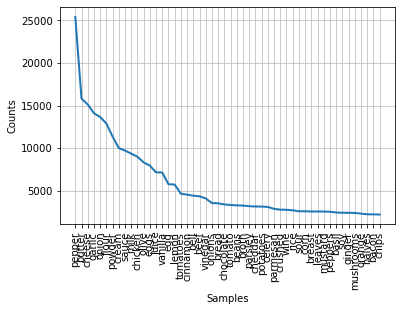

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
vocabulary1.plot(50)

In [18]:
from prettytable import PrettyTable
data = PrettyTable(["Ingredient", "Count"])
for i in vocabulary1.most_common(600):
    data.add_row(i)
with open("first_vocab.txt", 'w') as f:
    f.write(data.get_string())

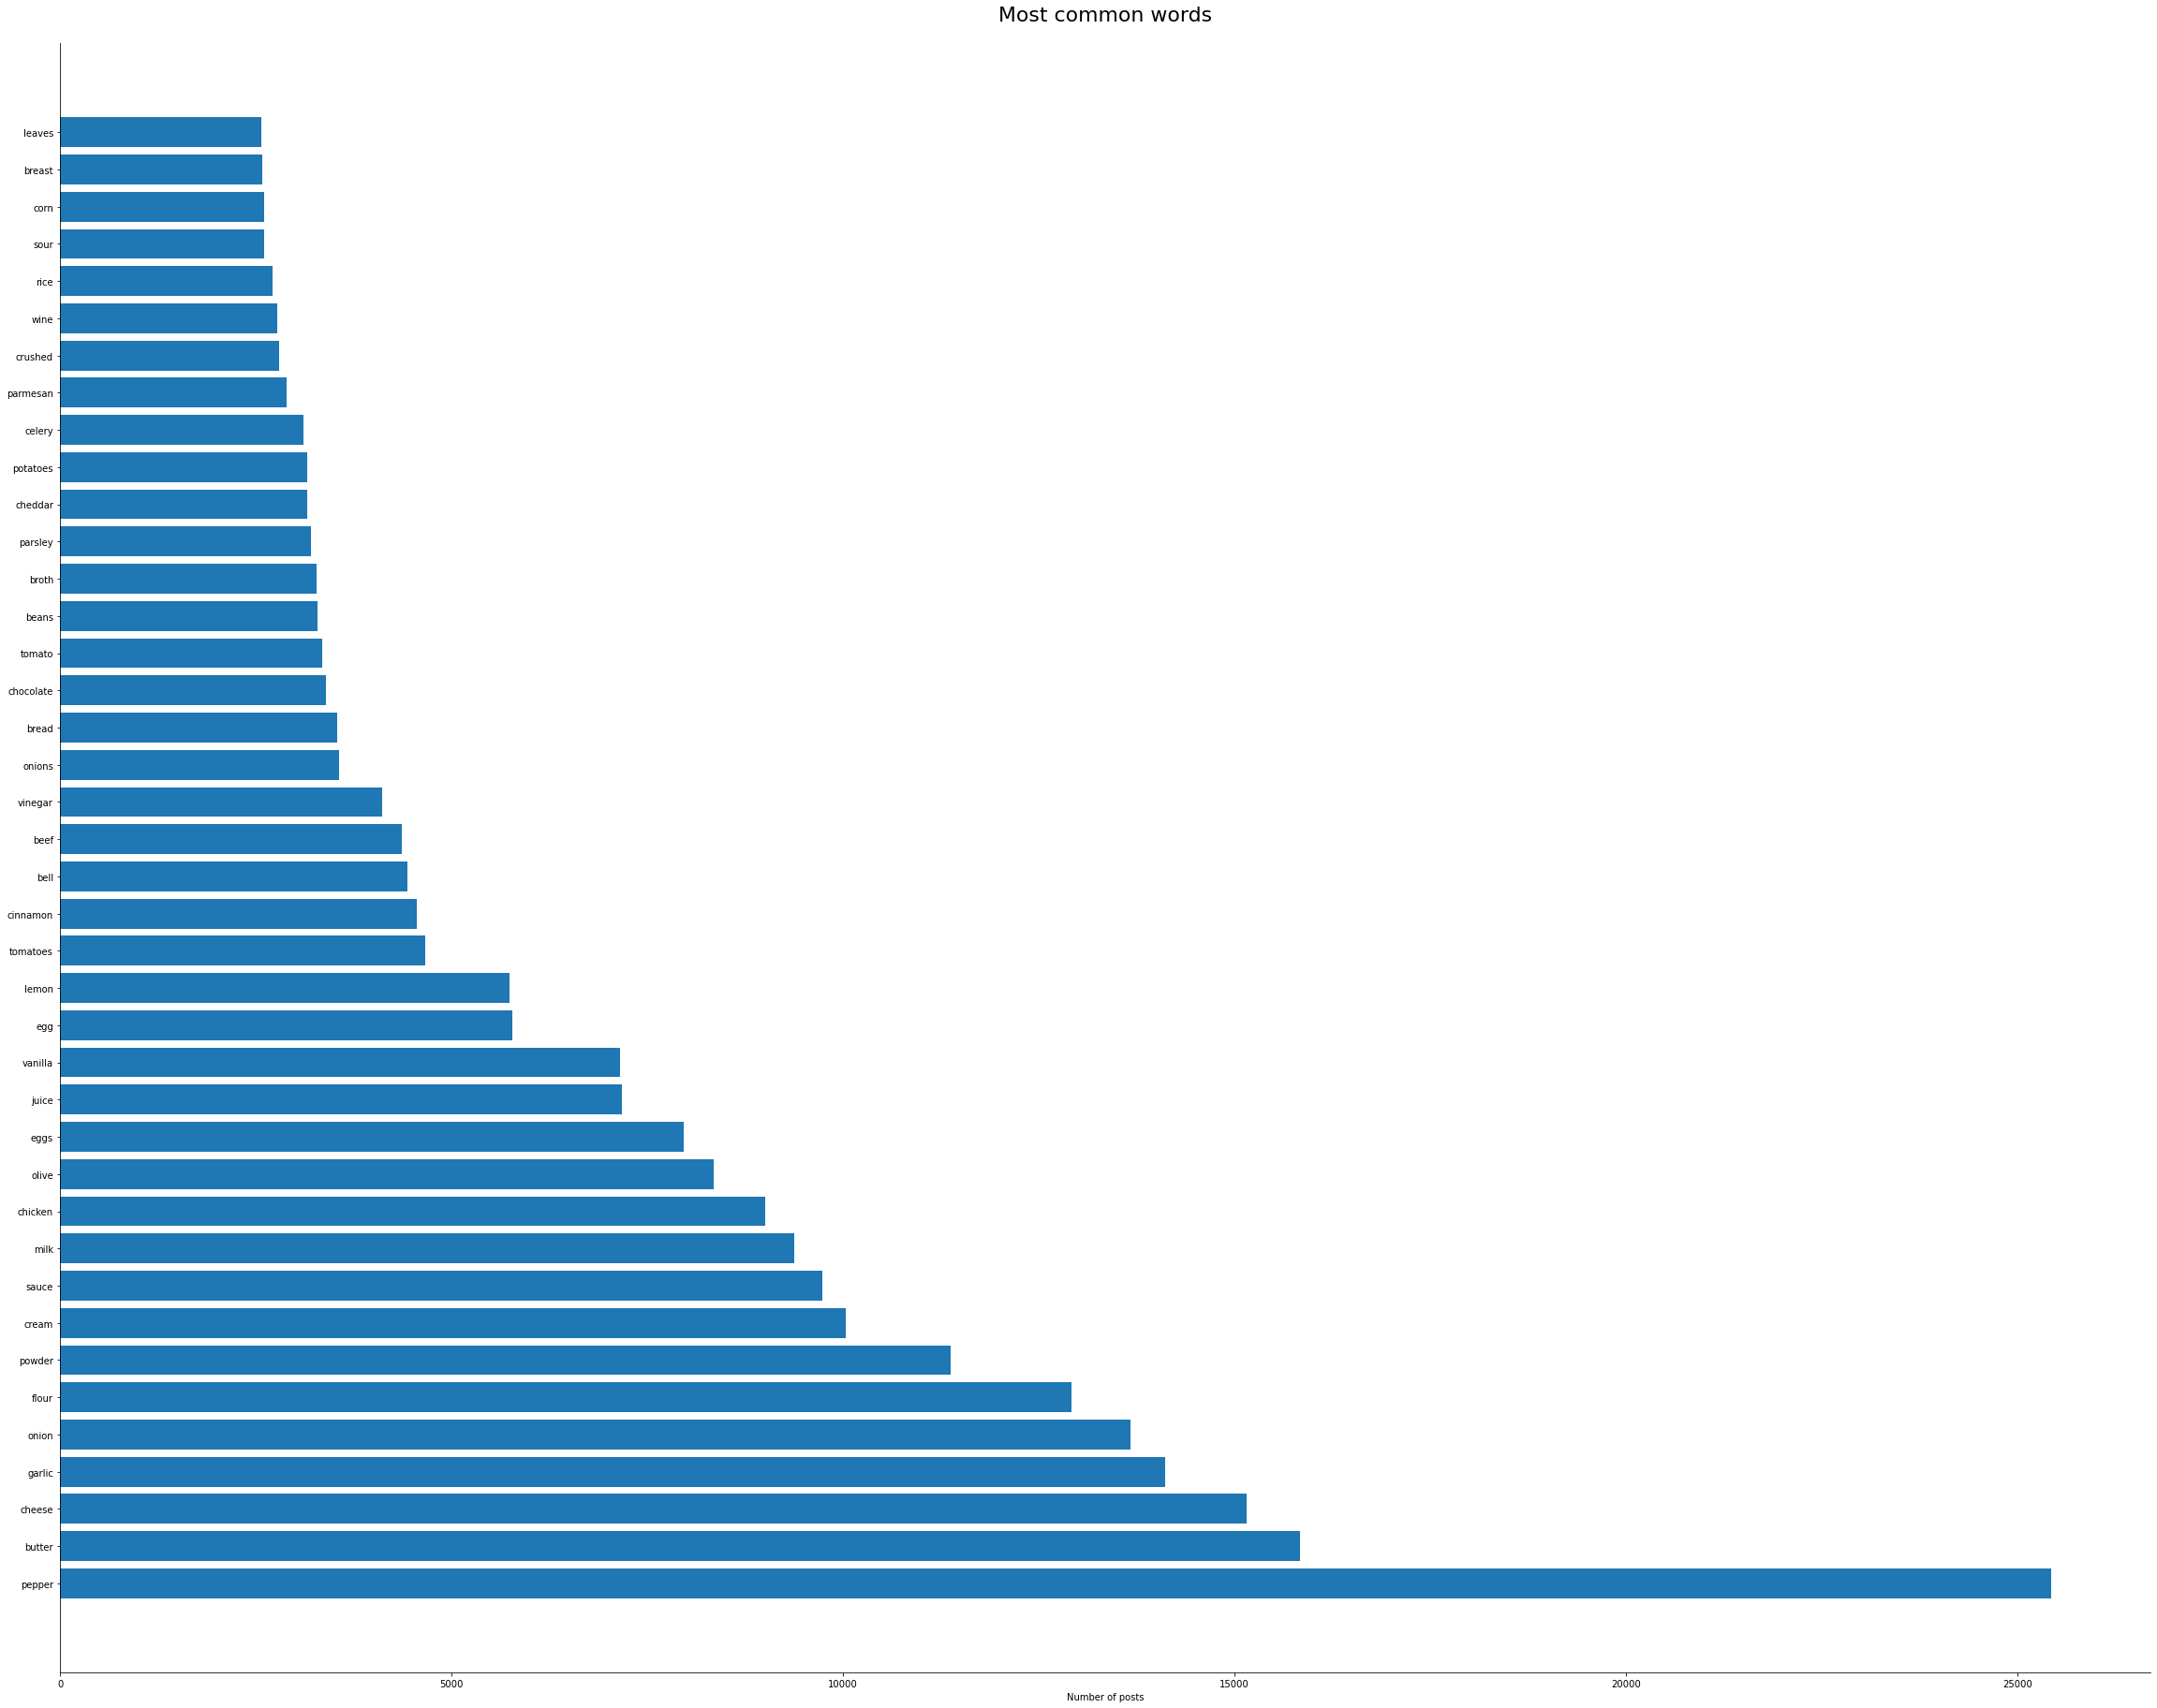

In [21]:
import matplotlib.pyplot as plt

# create a plot:
fig, ax = plt.subplots(figsize=(40,32))
plt.barh([x[0] for x in vocabulary1.most_common(40)],[x[1] for x in vocabulary1.most_common(40)], label='Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Number of posts')
plt.title('Most common words',fontsize=22,pad=24)
plt.show()